This notebook generates figures illustrating the multi-step prediction accuracy of the Allen-Cahn equation, as described in the Results section of the main text.

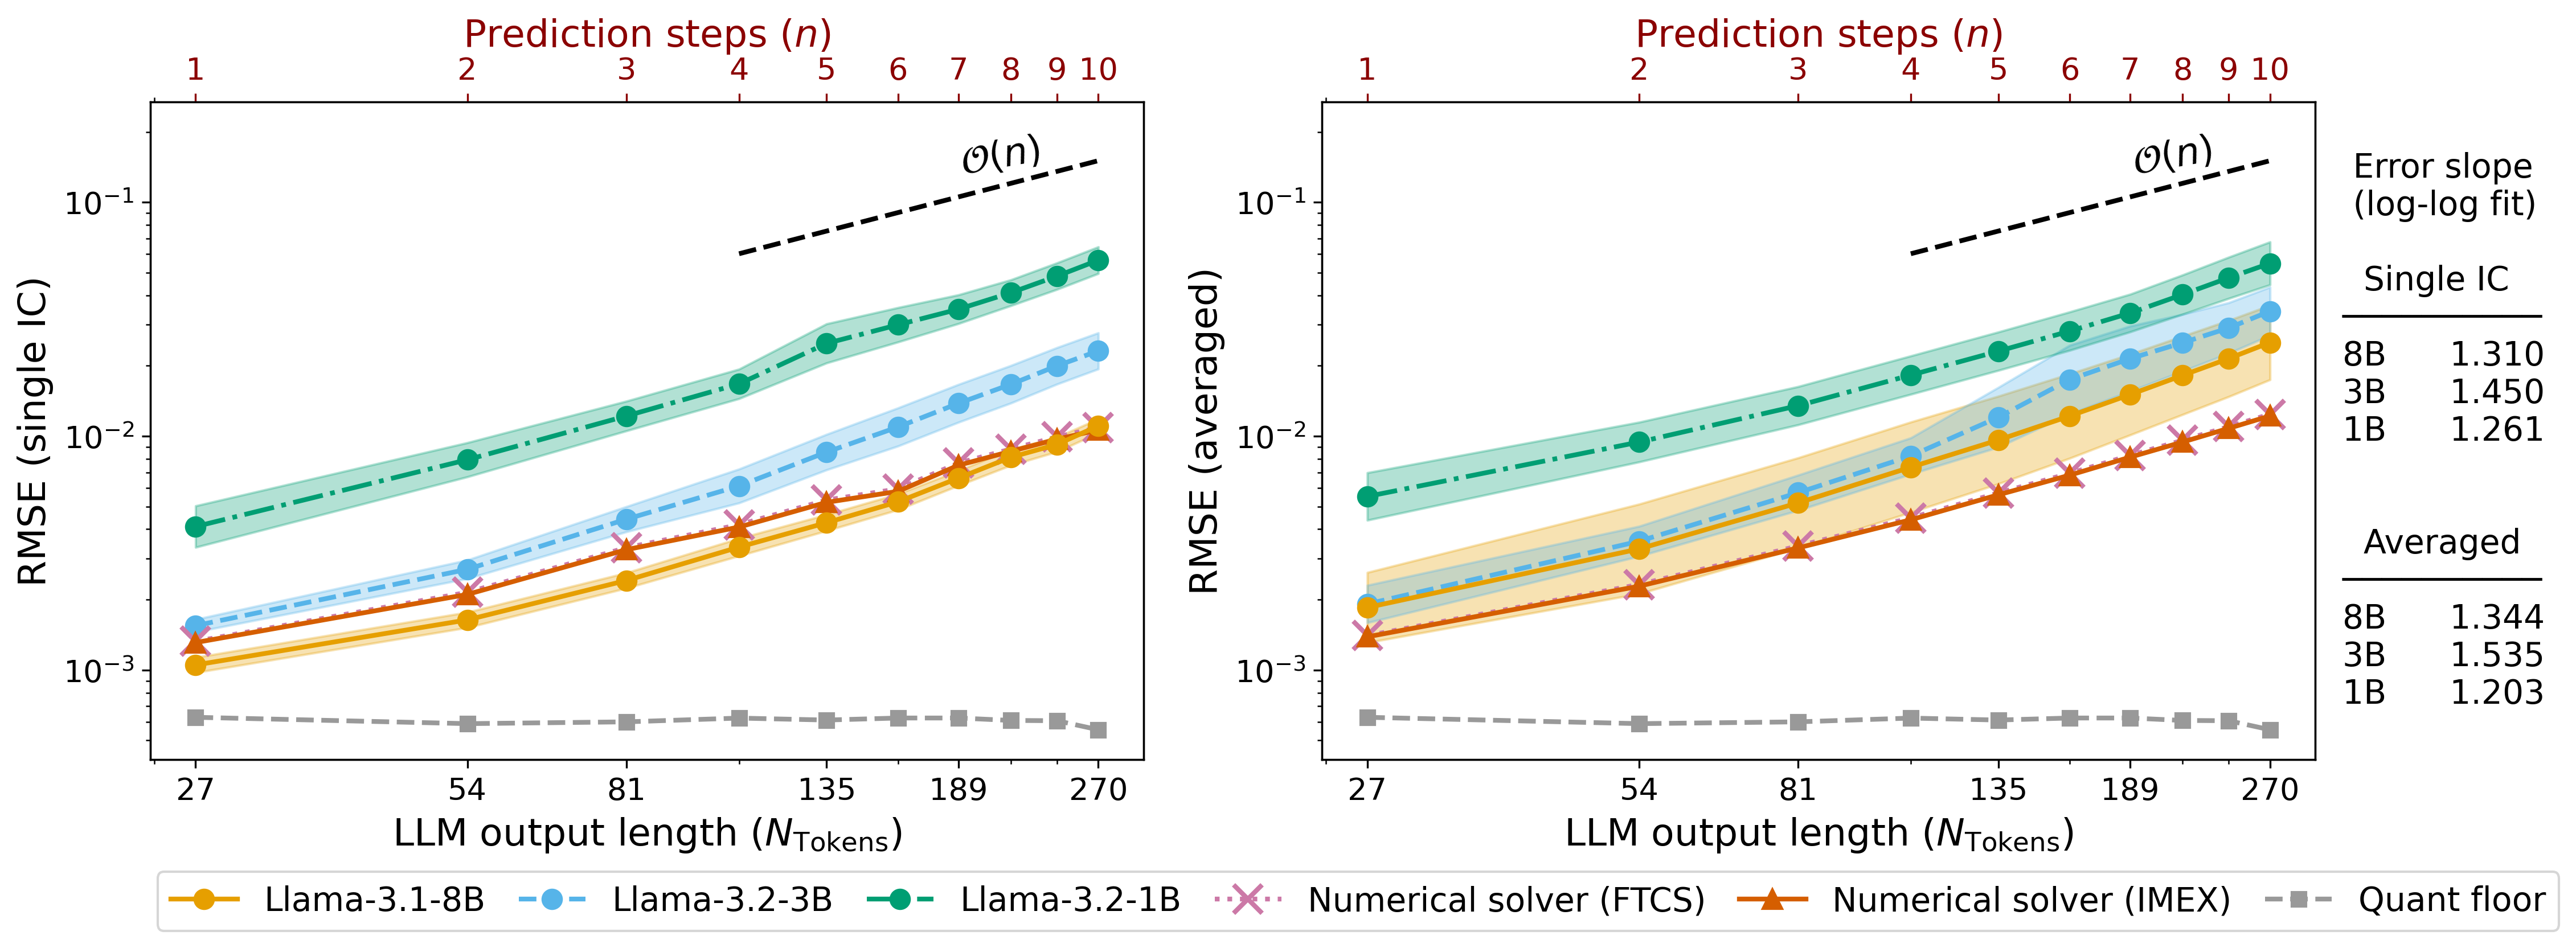

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load Llama-3.1-8B model data (averaged)
with np.load("8B_10_step.npz", allow_pickle=True) as data_8b:
    # LLM metrics
    llm_rmses = data_8b["llm_rmses_8B"]
    std_rmses = data_8b["std_rmses_8B"]
    # Pre-computed confidence intervals
    ci_lower_rmses = data_8b["ci_lower_rmses_8B"]
    ci_upper_rmses = data_8b["ci_upper_rmses_8B"]
    # Finite-difference metrics (for averaged results)
    fd_results_avg = data_8b["fd_results"].item()
    # Baseline metrics
    baseline_rmse_errors_prediction = data_8b["avg_baseline_rmse_errors_prediction"]

# Load Llama-3.2-3B model data (averaged)
with np.load("3B_10_step.npz", allow_pickle=True) as data_3b:
    # LLM metrics
    llm_rmses_3B = np.array(data_3b["llm_rmses_3B"])
    std_rmses_3B = np.array(data_3b["std_rmses_3B"])
    # Pre-computed confidence intervals
    ci_lower_rmses_3B = data_3b["ci_lower_rmses_3B"]
    ci_upper_rmses_3B = data_3b["ci_upper_rmses_3B"]

# Load Llama-3.2-1B model data (averaged)
with np.load("1B_10_step.npz", allow_pickle=True) as data_1b:
    # LLM metrics
    llm_rmses_1B = np.array(data_1b["llm_rmses_1B"])
    std_rmses_1B = np.array(data_1b["std_rmses_1B"])
    # Pre-computed confidence intervals
    ci_lower_rmses_1B = data_1b["ci_lower_rmses_1B"]
    ci_upper_rmses_1B = data_1b["ci_upper_rmses_1B"]


def log_ci(mean, std, n, tcrit):
    """
    95% CI for log10 axis
    mean : arithmetic mean of the n samples
    std : sample std of the n samples
    n : number of samples
    tcrit: two-sided t critical value
    """
    se = std / np.sqrt(n)  # SE in linear space
    se_log = se / (mean * np.log(10))  # delta-method SE in log space
    mean_log = np.log10(mean)
    delta_log = tcrit * se_log
    return 10**(mean_log - delta_log), 10**(mean_log + delta_log)


# Set parameters for CI calculation
n_seeds = 20
t_critical = stats.t.ppf(0.975, n_seeds - 1)  # 95% CI

# Load single initial condition data (demo files)
with np.load("8B_10_step_demo.npz", allow_pickle=True) as data_8b_demo:
    llm_rmses_8B_demo = data_8b_demo["llm_rmses_8B"]
    std_rmses_8B_demo = data_8b_demo["std_rmses_8B"]
    fd_results_demo = data_8b_demo["fd_results"].item()
# Calculate CIs for 8B demo data
ci_lower_rmses_8B_demo = []
ci_upper_rmses_8B_demo = []
for mean, std in zip(llm_rmses_8B_demo, std_rmses_8B_demo):
    lower, upper = log_ci(mean, std, n_seeds, t_critical)
    ci_lower_rmses_8B_demo.append(lower)
    ci_upper_rmses_8B_demo.append(upper)
ci_lower_rmses_8B_demo = np.array(ci_lower_rmses_8B_demo)
ci_upper_rmses_8B_demo = np.array(ci_upper_rmses_8B_demo)

with np.load("3B_10_step_demo.npz", allow_pickle=True) as data_3b_demo:
    llm_rmses_3B_demo = np.array(data_3b_demo["llm_rmses_3B"])
    std_rmses_3B_demo = np.array(data_3b_demo["std_rmses_3B"])
# Calculate CIs for 3B demo data
ci_lower_rmses_3B_demo = []
ci_upper_rmses_3B_demo = []
for mean, std in zip(llm_rmses_3B_demo, std_rmses_3B_demo):
    lower, upper = log_ci(mean, std, n_seeds, t_critical)
    ci_lower_rmses_3B_demo.append(lower)
    ci_upper_rmses_3B_demo.append(upper)
ci_lower_rmses_3B_demo = np.array(ci_lower_rmses_3B_demo)
ci_upper_rmses_3B_demo = np.array(ci_upper_rmses_3B_demo)

with np.load("1B_10_step_demo.npz", allow_pickle=True) as data_1b_demo:
    llm_rmses_1B_demo = np.array(data_1b_demo["llm_rmses_1B"])
    std_rmses_1B_demo = np.array(data_1b_demo["std_rmses_1B"])
# Calculate CIs for 1B demo data
ci_lower_rmses_1B_demo = []
ci_upper_rmses_1B_demo = []
for mean, std in zip(llm_rmses_1B_demo, std_rmses_1B_demo):
    lower, upper = log_ci(mean, std, n_seeds, t_critical)
    ci_lower_rmses_1B_demo.append(lower)
    ci_upper_rmses_1B_demo.append(upper)
ci_lower_rmses_1B_demo = np.array(ci_lower_rmses_1B_demo)
ci_upper_rmses_1B_demo = np.array(ci_upper_rmses_1B_demo)

# Extract finite difference solver results for single IC (from demo)
ftcs_max_diff_demo = fd_results_demo['ftcs']['max_diff']
ftcs_rmse_demo = fd_results_demo['ftcs']['rmse']
imex_max_diff_demo = fd_results_demo['imex']['max_diff']
imex_rmse_demo = fd_results_demo['imex']['rmse']

# Extract finite difference solver results for averaged (from averaged dataset)
ftcs_max_diff_avg = fd_results_avg['ftcs']['max_diff']
ftcs_rmse_avg = fd_results_avg['ftcs']['rmse']
imex_max_diff_avg = fd_results_avg['imex']['max_diff']
imex_rmse_avg = fd_results_avg['imex']['rmse']

reference_index = 6
# Calculate slopes for both single and averaged RMSE
names = ['Llama-3.1-8B', 'Llama-3.2-3B', 'Llama-3.2-1B']
short_names = ['8B', '3B', '1B']
rmses_demo_list = [llm_rmses_8B_demo, llm_rmses_3B_demo, llm_rmses_1B_demo]
rmses_avg_list = [llm_rmses, llm_rmses_3B, llm_rmses_1B]
n_min, n_max = 4, 10
n_vals = np.arange(n_min, n_max + 1)
idx = n_vals - 1
rmse_slopes_demo = []
rmse_slopes_avg = []
for name, rmse_demo, rmse_avg in zip(names, rmses_demo_list, rmses_avg_list):
    log_n = np.log(n_vals)
    log_rmse_demo = np.log(rmse_demo[idx])
    rmse_slope_demo, _ = np.polyfit(log_n, log_rmse_demo, 1)
    rmse_slopes_demo.append(rmse_slope_demo)
    log_rmse_avg = np.log(rmse_avg[idx])
    rmse_slope_avg, _ = np.polyfit(log_n, log_rmse_avg, 1)
    rmse_slopes_avg.append(rmse_slope_avg)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5.5), dpi=300)
steps_array = np.arange(1, len(llm_rmses) + 1)
colors = [
    "#E69F00",  # Llama-3.1-8B
    "#56B4E9",  # Llama-3.2-3B
    "#009E73",  # Llama-3.2-1B
    "#CC79A7",  # FTCS
    "#D55E00",  # IMEX
    "#999999",  # Quant floor
]

power_law_color = "black"
linewidth = 2
rmse_reference_avg = llm_rmses[reference_index]
power_law_rmse_avg = [rmse_reference_avg * n for n in steps_array]

# Plot RMSE from single initial condition (left subplot)
ax1.loglog(steps_array, llm_rmses_8B_demo, 'o-', label='Llama-3.1-8B',
           color=colors[0], markersize=8, linewidth=linewidth, zorder=5)
ax1.fill_between(steps_array, ci_lower_rmses_8B_demo, ci_upper_rmses_8B_demo,
                 alpha=0.3, color=colors[0])
ax1.loglog(steps_array, llm_rmses_3B_demo, 'o--', label='Llama-3.2-3B',
           color=colors[1], markersize=8, linewidth=linewidth)
ax1.fill_between(steps_array, ci_lower_rmses_3B_demo, ci_upper_rmses_3B_demo,
                 alpha=0.3, color=colors[1])
ax1.loglog(steps_array, llm_rmses_1B_demo, 'o-.', label='Llama-3.2-1B',
           color=colors[2], markersize=8, linewidth=linewidth)
ax1.fill_between(steps_array, ci_lower_rmses_1B_demo, ci_upper_rmses_1B_demo,
                 alpha=0.3, color=colors[2])
ax1.loglog(steps_array[:len(ftcs_rmse_demo)], ftcs_rmse_demo, 'x:', markeredgewidth=2,
           label='Numerical solver (FTCS)', color=colors[3], markersize=12, linewidth=linewidth)
ax1.loglog(steps_array[:len(imex_rmse_demo)], imex_rmse_demo, '^-',
           label='Numerical solver (IMEX)', color=colors[4], markersize=8, linewidth=linewidth)
ax1.loglog(steps_array, baseline_rmse_errors_prediction, 's--', color=colors[5],
            label='Quant floor', markersize=6, linewidth=linewidth)

# Plot RMSE from averaged results (right subplot)
ax2.loglog(steps_array, llm_rmses, 'o-', label='Llama-3.1-8B',
           color=colors[0], markersize=8, linewidth=linewidth, zorder=5)
ax2.fill_between(steps_array, ci_lower_rmses, ci_upper_rmses,
                 alpha=0.3, color=colors[0])
ax2.loglog(steps_array, llm_rmses_3B, 'o--', label='Llama-3.2-3B',
           color=colors[1], markersize=8, linewidth=linewidth)
ax2.fill_between(steps_array, ci_lower_rmses_3B, ci_upper_rmses_3B,
                 alpha=0.3, color=colors[1])
ax2.loglog(steps_array, llm_rmses_1B, 'o-.', label='Llama-3.2-1B',
           color=colors[2], markersize=8, linewidth=linewidth)
ax2.fill_between(steps_array, ci_lower_rmses_1B, ci_upper_rmses_1B,
                 alpha=0.3, color=colors[2])
ax2.loglog(steps_array[:len(ftcs_rmse_avg)], ftcs_rmse_avg, 'x:', markeredgewidth=2,
           label='Numerical solver (FTCS)', color=colors[3], markersize=12, linewidth=linewidth)
ax2.loglog(steps_array[:len(imex_rmse_avg)], imex_rmse_avg, '^-',
           label='Numerical solver (IMEX)', color=colors[4], markersize=8, linewidth=linewidth)
ax2.loglog(steps_array, baseline_rmse_errors_prediction, 's--', color=colors[5],
            label='Quant floor', markersize=6, linewidth=linewidth)
# Add O(n) reference for left subplot
ax1.loglog(steps_array[3:11], power_law_rmse_avg[3:11], '--',
           linewidth=linewidth, color=power_law_color)
ax1.annotate(r'$\mathcal{O}(n)$',
             xy=(steps_array[reference_index], power_law_rmse_avg[reference_index + 1]),
             xytext=(0, 4), textcoords='offset points',
             color=power_law_color, fontsize=16, rotation=10)

ax1.set_xlabel(r"LLM output length ($N_{\text{Tokens}}$)", fontsize=16)
ax1.set_ylabel("RMSE (single IC)", fontsize=16)
# Add O(n) reference for right subplot
ax2.loglog(steps_array[3:11], power_law_rmse_avg[3:11], '--',
           color=power_law_color, linewidth=linewidth)
ax2.annotate(r'$\mathcal{O}(n)$',
             xy=(steps_array[reference_index], power_law_rmse_avg[reference_index + 1]),
             xytext=(0, 4), textcoords='offset points',
             color=power_law_color, fontsize=16, rotation=10)
ax2.set_xlabel(r"LLM output length ($N_{\text{Tokens}}$)", fontsize=16)
ax2.set_ylabel("RMSE (averaged)", fontsize=16)

# Synchronize y-axis ranges between subplots
all_data = [
    llm_rmses_8B_demo, llm_rmses_3B_demo, llm_rmses_1B_demo,
    llm_rmses, llm_rmses_3B, llm_rmses_1B, 
    ftcs_rmse_demo, imex_rmse_demo, 
    ftcs_rmse_avg, imex_rmse_avg,   
    baseline_rmse_errors_prediction,
    ci_lower_rmses_8B_demo, ci_upper_rmses_8B_demo,
    ci_lower_rmses_3B_demo, ci_upper_rmses_3B_demo,
    ci_lower_rmses_1B_demo, ci_upper_rmses_1B_demo,
    ci_lower_rmses, ci_upper_rmses,
    ci_lower_rmses_3B, ci_upper_rmses_3B,
    ci_lower_rmses_1B, ci_upper_rmses_1B
]
y_min = min(np.min(data) for data in all_data if len(data) > 0)
y_max = 2e-1
log_range = np.log10(y_max) - np.log10(y_min)
y_min_padded = 10**(np.log10(y_min) - 0.05 * log_range)
y_max_padded = 10**(np.log10(y_max) + 0.05 * log_range)
ax1.set_ylim(y_min_padded, y_max_padded)
ax2.set_ylim(y_min_padded, y_max_padded)
selected_positions = [1, 2, 3, 5, 7, 10] 
selected_tick_positions = [pos for pos in steps_array if pos in selected_positions]
token_tick_labels = [str(int(pos * 27)) for pos in selected_tick_positions]
ax1.set_xticks(selected_tick_positions)
ax1.set_xticklabels(token_tick_labels)
ax2.set_xticks(selected_tick_positions)
ax2.set_xticklabels(token_tick_labels)
ax1.tick_params(axis='both', which='major', labelsize=13)
ax2.tick_params(axis='both', which='major', labelsize=13)
ax1_top = ax1.twiny()
ax2_top = ax2.twiny()
ax1_top.set_xlim(ax1.get_xlim())
ax2_top.set_xlim(ax2.get_xlim())
ax1_top.set_xscale('log')
ax2_top.set_xscale('log')
ax1_top.set_xticks(list(steps_array))
ax1_top.set_xticklabels([str(int(pos)) for pos in steps_array])
ax2_top.set_xticks(list(steps_array))
ax2_top.set_xticklabels([str(int(pos)) for pos in steps_array])
ax1_top.set_xlabel("Prediction steps ($n$)", fontsize=16, color='darkred')
ax2_top.set_xlabel("Prediction steps ($n$)", fontsize=16, color='darkred')
ax1_top.tick_params(axis='x', which='major', labelsize=13, colors='darkred')
ax2_top.tick_params(axis='x', which='major', labelsize=13, colors='darkred')
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=6, fontsize=14, handlelength=2,
           bbox_to_anchor=(0.5, 0.0), columnspacing=1)
slope_text = " Error slope\n (log-log fit)\n\n"
slope_text += "  Single IC\n"
slope_text += "──────────\n"
for i, short_name in enumerate(short_names):
    slope_text += f"{short_name:<7} {rmse_slopes_demo[i]:>5.3f}\n"
slope_text += "\n\n"
slope_text += "  Averaged\n"
slope_text += "──────────\n"
for i, short_name in enumerate(short_names):
    slope_text += f"{short_name:<7} {rmse_slopes_avg[i]:>5.3f}\n"
fig.text(0.86, 0.53, slope_text, transform=fig.transFigure, 
         fontsize=14,
         verticalalignment='center')
plt.tight_layout()
plt.subplots_adjust(wspace=0.18, bottom=0.2, top=0.9, right=0.85) 
plt.show()

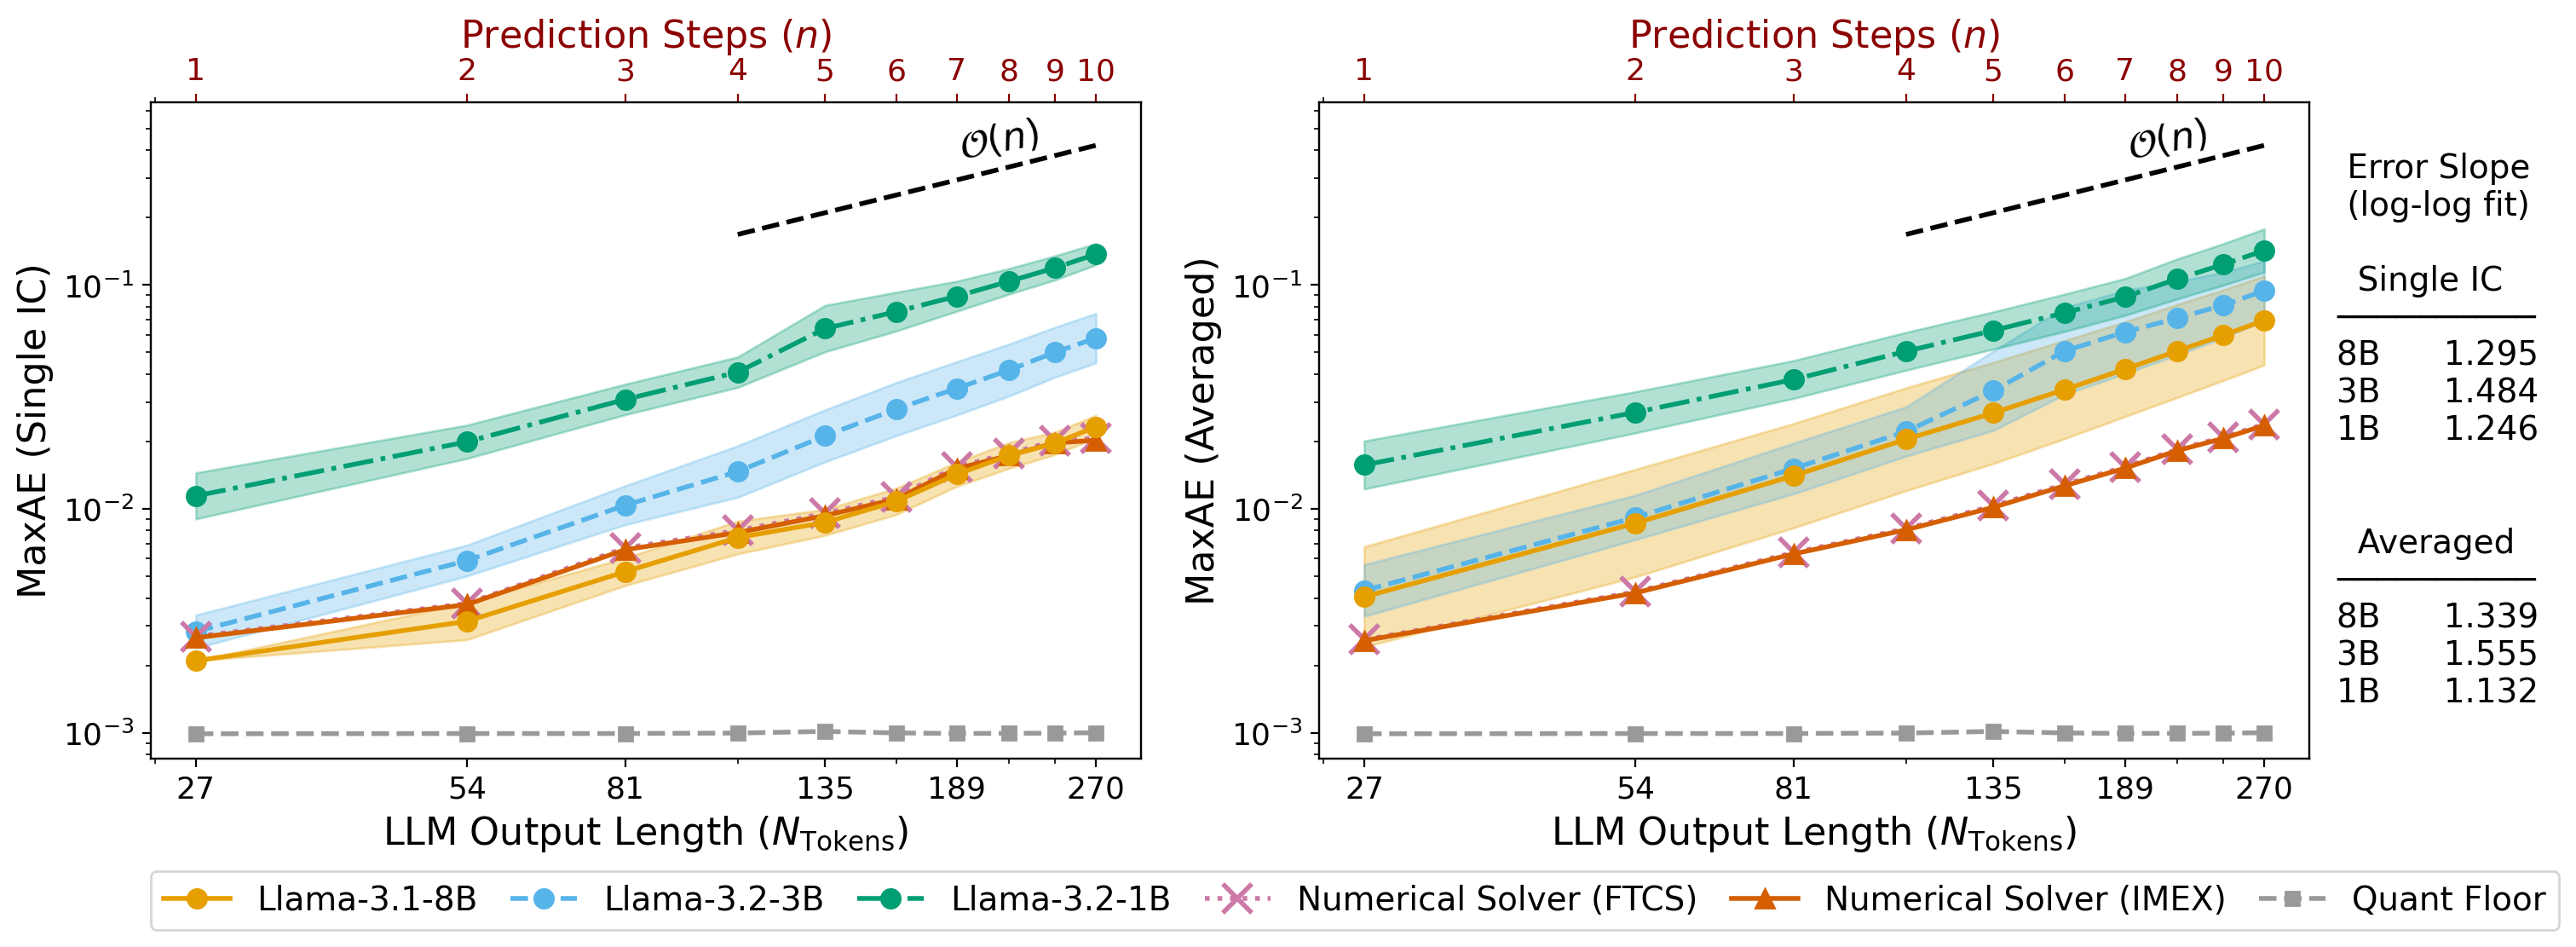

In [2]:
# Load Llama-3.1-8B model data (averaged)
with np.load("8B_10_step.npz", allow_pickle=True) as data_8b:
    # LLM metrics
    llm_max_diffs = data_8b["llm_max_diffs_8B"]
    std_max_diffs = data_8b["std_max_diffs_8B"]
    # Pre-computed confidence intervals
    ci_lower_max_diffs = data_8b["ci_lower_max_diffs_8B"]
    ci_upper_max_diffs = data_8b["ci_upper_max_diffs_8B"]
    # Finite-difference metrics (for averaged results)
    fd_results_avg = data_8b["fd_results"].item()
    # Baseline metrics
    baseline_max_errors_prediction = data_8b["avg_baseline_max_errors_prediction"]

# Load Llama-3.2-3B model data (averaged)
with np.load("3B_10_step.npz", allow_pickle=True) as data_3b:
    # LLM metrics
    llm_max_diffs_3B = np.array(data_3b["llm_max_diffs_3B"])
    std_max_diffs_3B = np.array(data_3b["std_max_diffs_3B"])
    # Pre-computed confidence intervals
    ci_lower_max_diffs_3B = data_3b["ci_lower_max_diffs_3B"]
    ci_upper_max_diffs_3B = data_3b["ci_upper_max_diffs_3B"]

# Load Llama-3.2-1B model data (averaged)
with np.load("1B_10_step.npz", allow_pickle=True) as data_1b:
    # LLM metrics
    llm_max_diffs_1B = np.array(data_1b["llm_max_diffs_1B"])
    std_max_diffs_1B = np.array(data_1b["std_max_diffs_1B"])

    ci_lower_max_diffs_1B = data_1b["ci_lower_max_diffs_1B"]
    ci_upper_max_diffs_1B = data_1b["ci_upper_max_diffs_1B"]

# Load single initial condition data (demo files)
with np.load("8B_10_step_demo.npz", allow_pickle=True) as data_8b_demo:
    llm_max_diffs_8B_demo = data_8b_demo["llm_max_diffs_8B"]
    std_max_diffs_8B_demo = data_8b_demo["std_max_diffs_8B"]
    fd_results_demo = data_8b_demo["fd_results"].item()
# Calculate CIs for 8B demo data
ci_lower_max_diffs_8B_demo = []
ci_upper_max_diffs_8B_demo = []
for mean, std in zip(llm_max_diffs_8B_demo, std_max_diffs_8B_demo):
    lower, upper = log_ci(mean, std, n_seeds, t_critical)
    ci_lower_max_diffs_8B_demo.append(lower)
    ci_upper_max_diffs_8B_demo.append(upper)
ci_lower_max_diffs_8B_demo = np.array(ci_lower_max_diffs_8B_demo)
ci_upper_max_diffs_8B_demo = np.array(ci_upper_max_diffs_8B_demo)

with np.load("3B_10_step_demo.npz", allow_pickle=True) as data_3b_demo:
    llm_max_diffs_3B_demo = np.array(data_3b_demo["llm_max_diffs_3B"])
    std_max_diffs_3B_demo = np.array(data_3b_demo["std_max_diffs_3B"])
# Calculate CIs for 3B demo data
ci_lower_max_diffs_3B_demo = []
ci_upper_max_diffs_3B_demo = []
for mean, std in zip(llm_max_diffs_3B_demo, std_max_diffs_3B_demo):
    lower, upper = log_ci(mean, std, n_seeds, t_critical)
    ci_lower_max_diffs_3B_demo.append(lower)
    ci_upper_max_diffs_3B_demo.append(upper)
ci_lower_max_diffs_3B_demo = np.array(ci_lower_max_diffs_3B_demo)
ci_upper_max_diffs_3B_demo = np.array(ci_upper_max_diffs_3B_demo)

with np.load("1B_10_step_demo.npz", allow_pickle=True) as data_1b_demo:
    llm_max_diffs_1B_demo = np.array(data_1b_demo["llm_max_diffs_1B"])
    std_max_diffs_1B_demo = np.array(data_1b_demo["std_max_diffs_1B"])
# Calculate CIs for 1B demo data
ci_lower_max_diffs_1B_demo = []
ci_upper_max_diffs_1B_demo = []
for mean, std in zip(llm_max_diffs_1B_demo, std_max_diffs_1B_demo):
    lower, upper = log_ci(mean, std, n_seeds, t_critical)
    ci_lower_max_diffs_1B_demo.append(lower)
    ci_upper_max_diffs_1B_demo.append(upper)
ci_lower_max_diffs_1B_demo = np.array(ci_lower_max_diffs_1B_demo)
ci_upper_max_diffs_1B_demo = np.array(ci_upper_max_diffs_1B_demo)

# Extract finite difference solver results for single IC (from demo)
ftcs_max_diff_demo = fd_results_demo['ftcs']['max_diff']
imex_max_diff_demo = fd_results_demo['imex']['max_diff']
# Extract finite difference solver results for averaged (from averaged dataset)
ftcs_max_diff_avg = fd_results_avg['ftcs']['max_diff']
imex_max_diff_avg = fd_results_avg['imex']['max_diff']

reference_index = 6
names = ['Llama-3.1-8B', 'Llama-3.2-3B', 'Llama-3.2-1B']
short_names = ['8B', '3B', '1B']
# Calculate slopes for both single and averaged MaxAE
max_demo_list = [llm_max_diffs_8B_demo, llm_max_diffs_3B_demo, llm_max_diffs_1B_demo]
max_avg_list = [llm_max_diffs, llm_max_diffs_3B, llm_max_diffs_1B]
n_min, n_max = 4, 10
n_vals = np.arange(n_min, n_max + 1)
idx = n_vals - 1
max_slopes_demo = []
max_slopes_avg = []
for name, max_demo, max_avg in zip(names, max_demo_list, max_avg_list):
    log_n = np.log(n_vals)
    max_slope_demo, _ = np.polyfit(log_n, np.log(max_demo[idx]), 1)
    max_slopes_demo.append(max_slope_demo)
    max_slope_avg, _ = np.polyfit(log_n, np.log(max_avg[idx]), 1)
    max_slopes_avg.append(max_slope_avg)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5.5), dpi=200)
steps_array = np.arange(1, len(llm_max_diffs) + 1)
colors = [
    "#E69F00",  # Llama-3.1-8B
    "#56B4E9",  # Llama-3.2-3B
    "#009E73",  # Llama-3.2-1B
    "#CC79A7",  # FTCS
    "#D55E00",  # IMEX
    "#999999",  # Quant floor
]

power_law_color = "black"
linewidth = 2
max_reference_avg = llm_max_diffs[reference_index]
power_law_max_avg = [max_reference_avg * n for n in steps_array]

# Plot MaxAE from single initial condition (left subplot) using demo FD results
ax1.loglog(steps_array, llm_max_diffs_8B_demo, 'o-', label='Llama-3.1-8B',
           color=colors[0], markersize=8, linewidth=linewidth, zorder=5)
ax1.fill_between(steps_array, ci_lower_max_diffs_8B_demo, ci_upper_max_diffs_8B_demo,
                 alpha=0.3, color=colors[0])
ax1.loglog(steps_array, llm_max_diffs_3B_demo, 'o--', label='Llama-3.2-3B',
           color=colors[1], markersize=8, linewidth=linewidth)
ax1.fill_between(steps_array, ci_lower_max_diffs_3B_demo, ci_upper_max_diffs_3B_demo,
                 alpha=0.3, color=colors[1])
ax1.loglog(steps_array, llm_max_diffs_1B_demo, 'o-.', label='Llama-3.2-1B',
           color=colors[2], markersize=8, linewidth=linewidth)
ax1.fill_between(steps_array, ci_lower_max_diffs_1B_demo, ci_upper_max_diffs_1B_demo,
                 alpha=0.3, color=colors[2])
ax1.loglog(steps_array[:len(ftcs_max_diff_demo)], ftcs_max_diff_demo, 'x:', markeredgewidth=2,
           label='Numerical Solver (FTCS)', color=colors[3], markersize=12, linewidth=linewidth)
ax1.loglog(steps_array[:len(imex_max_diff_demo)], imex_max_diff_demo, '^-',
           label='Numerical Solver (IMEX)', color=colors[4], markersize=8, linewidth=linewidth)
ax1.loglog(steps_array, baseline_max_errors_prediction, 's--', color=colors[5],
            label='Quant Floor', markersize=6, linewidth=linewidth)

# Plot MaxAE from averaged results (right subplot) using averaged FD results
ax2.loglog(steps_array, llm_max_diffs, 'o-', label='Llama-3.1-8B',
           color=colors[0], markersize=8, linewidth=linewidth, zorder=5)
ax2.fill_between(steps_array, ci_lower_max_diffs, ci_upper_max_diffs,
                 alpha=0.3, color=colors[0])
ax2.loglog(steps_array, llm_max_diffs_3B, 'o--', label='Llama-3.2-3B',
           color=colors[1], markersize=8, linewidth=linewidth)
ax2.fill_between(steps_array, ci_lower_max_diffs_3B, ci_upper_max_diffs_3B,
                 alpha=0.3, color=colors[1])
ax2.loglog(steps_array, llm_max_diffs_1B, 'o-.', label='Llama-3.2-1B',
           color=colors[2], markersize=8, linewidth=linewidth)
ax2.fill_between(steps_array, ci_lower_max_diffs_1B, ci_upper_max_diffs_1B,
                 alpha=0.3, color=colors[2])
ax2.loglog(steps_array[:len(ftcs_max_diff_avg)], ftcs_max_diff_avg, 'x:', markeredgewidth=2,
           label='Numerical Solver (FTCS)', color=colors[3], markersize=12, linewidth=linewidth)
ax2.loglog(steps_array[:len(imex_max_diff_avg)], imex_max_diff_avg, '^-',
           label='Numerical Solver (IMEX)', color=colors[4], markersize=8, linewidth=linewidth)
ax2.loglog(steps_array, baseline_max_errors_prediction, 's--', color=colors[5],
            label='Quant Floor', markersize=6, linewidth=linewidth)
# Add O(n) reference lines and annotation for left subplot
ax1.loglog(steps_array[3:11], power_law_max_avg[3:11], '--',
           linewidth=linewidth, color=power_law_color)
ax1.annotate(r'$\mathcal{O}(n)$',
             xy=(steps_array[reference_index], power_law_max_avg[reference_index + 1]),
             xytext=(0, 4), textcoords='offset points',
             color=power_law_color, fontsize=16, rotation=10)
# Add O(n) reference lines and annotation for right subplot
ax2.loglog(steps_array[3:11], power_law_max_avg[3:11], '--',
           color=power_law_color, linewidth=linewidth)
ax2.annotate(r'$\mathcal{O}(n)$',
             xy=(steps_array[reference_index], power_law_max_avg[reference_index + 1]),
             xytext=(0, 4), textcoords='offset points',
             color=power_law_color, fontsize=16, rotation=10)
ax1.set_xlabel(r"LLM Output Length ($N_{\text{Tokens}}$)", fontsize=16)
ax1.set_ylabel("MaxAE (Single IC)", fontsize=16)
ax2.set_xlabel(r"LLM Output Length ($N_{\text{Tokens}}$)", fontsize=16)
ax2.set_ylabel("MaxAE (Averaged)", fontsize=16)

# Synchronize y-axis ranges between subplots
all_data = [
    llm_max_diffs_8B_demo, llm_max_diffs_3B_demo, llm_max_diffs_1B_demo,
    llm_max_diffs, llm_max_diffs_3B, llm_max_diffs_1B,
    ftcs_max_diff_demo, imex_max_diff_demo,
    ftcs_max_diff_avg, imex_max_diff_avg,
    baseline_max_errors_prediction,
    ci_lower_max_diffs_8B_demo, ci_upper_max_diffs_8B_demo,
    ci_lower_max_diffs_3B_demo, ci_upper_max_diffs_3B_demo,
    ci_lower_max_diffs_1B_demo, ci_upper_max_diffs_1B_demo,
    ci_lower_max_diffs, ci_upper_max_diffs,
    ci_lower_max_diffs_3B, ci_upper_max_diffs_3B,
    ci_lower_max_diffs_1B, ci_upper_max_diffs_1B
]

y_min = min(np.min(data) for data in all_data if len(data) > 0)
y_max = max(np.max(data) for data in all_data if len(data) > 0)
log_range = np.log10(y_max) - np.log10(y_min)
y_min_padded = 10**(np.log10(y_min) - 0.05 * log_range)
y_max_padded = 10**(np.log10(y_max) + 0.25 * log_range)
ax1.set_ylim(y_min_padded, y_max_padded)
ax2.set_ylim(y_min_padded, y_max_padded)
selected_positions = [1, 2, 3, 5, 7, 10]
selected_tick_positions = [pos for pos in steps_array if pos in selected_positions]
token_tick_labels = [str(int(pos * 27)) for pos in selected_tick_positions]
ax1.set_xticks(selected_tick_positions)
ax1.set_xticklabels(token_tick_labels)
ax2.set_xticks(selected_tick_positions)
ax2.set_xticklabels(token_tick_labels)
ax1.tick_params(axis='both', which='major', labelsize=13)
ax2.tick_params(axis='both', which='major', labelsize=13)
ax1_top = ax1.twiny()
ax2_top = ax2.twiny()
ax1_top.set_xlim(ax1.get_xlim())
ax2_top.set_xlim(ax2.get_xlim())
ax1_top.set_xscale('log')
ax2_top.set_xscale('log')
ax1_top.set_xticks(list(steps_array))
ax1_top.set_xticklabels([str(int(pos)) for pos in steps_array])
ax2_top.set_xticks(list(steps_array))
ax2_top.set_xticklabels([str(int(pos)) for pos in steps_array])
ax1_top.set_xlabel("Prediction Steps ($n$)", fontsize=16, color='darkred')
ax2_top.set_xlabel("Prediction Steps ($n$)", fontsize=16, color='darkred')
ax1_top.tick_params(axis='x', which='major', labelsize=13, colors='darkred')
ax2_top.tick_params(axis='x', which='major', labelsize=13, colors='darkred')

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=6, fontsize=14, handlelength=2,
           bbox_to_anchor=(0.5, 0.0), columnspacing=1)
slope_text = " Error Slope\n (log-log fit)\n\n"
slope_text += "  Single IC\n"
slope_text += "──────────\n"
for i, short_name in enumerate(short_names):
    slope_text += f"{short_name:<7} {max_slopes_demo[i]:>5.3f}\n"
slope_text += "\n\n"
slope_text += "  Averaged\n"
slope_text += "──────────\n"
for i, short_name in enumerate(short_names):
    slope_text += f"{short_name:<7} {max_slopes_avg[i]:>5.3f}\n"
fig.text(0.86, 0.53, slope_text, transform=fig.transFigure,
         fontsize=14, verticalalignment='center')
plt.tight_layout()
plt.subplots_adjust(wspace=0.18, bottom=0.2, top=0.9, right=0.85)
plt.show()